The purpose of this notebook is to show how to **read** some research data in python.

For example,

*   *Ni-foil-XAS-data-from-ISS-beamline.dat* is an X-ray absorption spectroscopy data from ISS beamline of NSLS-II
*   *Ni-foil-XAS-data-from-QAS-beamline.dat* is an X-ray absorption spectroscopy data from QAS beamline of NSLS-II
*   *Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi* is X-ray diffraction data from XPD beamline of NSLS-II
*   *25KI-LiCl-KCl_25oC.xlsx* is excel file from a benchtop XRD equipment
*   topas.inp is an input file for TOPAS XRD refinement program and topas.out is an output file from TOPAS.
*   bde401ed-ac56-45cd-b0c5_000000.h5 is an hdf file from X-ray fluoresence detector at XPD beamline of NSLS-II
...

It should be noted that the purpose of this notebook is NOT to make pretty figures. Instead to show how to read
these files with Python....




# general imports

In [ ]:
# We need to import some Python libraries here first.

import os
import sys
import shutil
import scipy

import numpy as np
import xarray as xr

In [ ]:
# It would be good to have interactive plots if ipympl is installed.
# See: https://matplotlib.org/ipympl/

try:
    %matplotlib widget
except:
    %matplotlib inline


# importing matplotlib for plots.
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.max_open_warning': 0})
plt.rcParams['figure.constrained_layout.use'] = True

# setting up the example data path

In [ ]:
# We assume this notebook and its data is on Google Drive so that we can use Google Colab.
# Otherwise, replace XXX with the exact path where this notebook (000.read_research_data_into_python.ipynb)
# and its data folder (000.read_research_data_into_python.data) is.

try:
    from google.colab import drive
    drive.mount('/content/drive')
    os.chdir('/content/drive/MyDrive/SULI-2024/repositories/pySULI/notebooks/')
except Exception as exc:
    print(exc)
    os.chdir('.')

In [ ]:
# Assuming 000.read_research_data_into_python.data and 000.read_research_data_into_python.ipynb are here.

here = os.getcwd()
example_data_path = '000.read_research_data_into_python.data'

os.listdir('%s/%s'%(here,example_data_path))

# reading plain text files (txt, dat..)

In [ ]:
# navigate into plain_text directory
os.chdir('%s/%s/%s'%(here,example_data_path,'plain_text'))

# list the contents of directory
os.listdir()

\



`two-column-data.txt` here is a simple two-column text file.
For someone who doesn't know python, it can be imported into excel

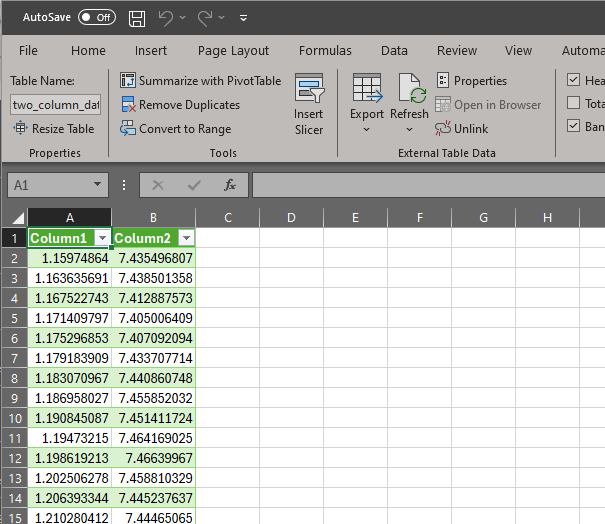

But this is very inefficient and we want "python" way of reading this file.

\

In Python, it is only 3-lines of code to read and plot the contents of this file.

In [ ]:
data = np.loadtxt('two-column-data.txt',unpack=True)
plt.figure()
plt.plot(data[0],data[1])

In [ ]:
# but same lines will not work for Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi file that has some extra lines at the beginning.
data = np.loadtxt('Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi',unpack=True)
plt.figure()
plt.plot(data[0],data[1])

In [ ]:
# On Google Colab, you can use `head` linux command to see the first 10 lines of the file.
! head -n 10 Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi

In [ ]:
# We need to use "skiprows" keyword in np.loadtxt function to exclude the first 7 lines
data = np.loadtxt('Ni_calib_20190301-150927_459ff6_0001_mean_tth.chi',unpack=True,skiprows=7)
plt.figure()
plt.plot(data[0],data[1])

\
Now we want to read *Ni-foil-XAS-data-from-ISS-beamline.dat* file here

\

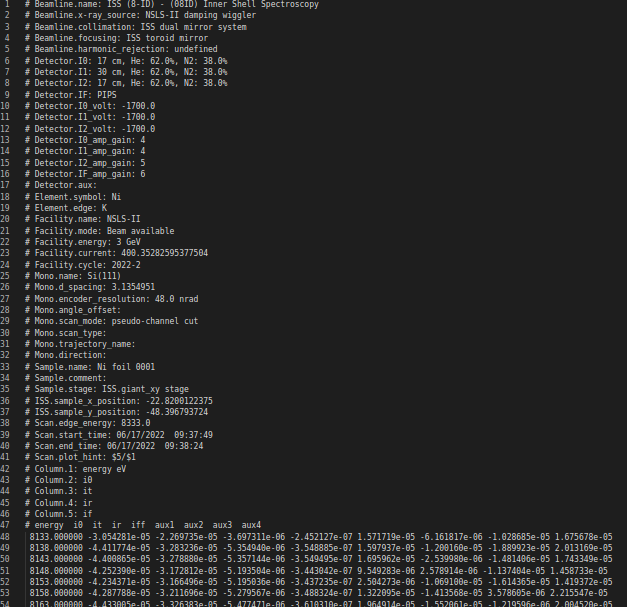

\

From the header lines, we can see first column is energy, the other columns are i0, it (transmission), ir (reference), iff (fluoresence) channels.



In [ ]:
# we can load the file and plot i0, it (transmission), ir (reference), iff (fluoresence) channels like this:

E, I0, It, Ir, If = np.loadtxt('Ni-foil-XAS-data-from-ISS-beamline.dat',unpack=True,usecols=[0,1,2,3,4])

fig = plt.figure(figsize=(8,6))

ax = fig.add_subplot(2,2,1)
ax.plot(E,I0)
ax.set_title('I_0 channel')

ax = fig.add_subplot(2,2,2)
ax.plot(E,It)
ax.set_title('I_trans. channel')

ax = fig.add_subplot(2,2,3)
ax.plot(E,Ir)
ax.set_title('I_ref. channel')

ax = fig.add_subplot(2,2,4)
ax.plot(E,If)
ax.set_title('I_fluo. channel')

\
For XAS theory you can check Bruce Ravel's NSLS-II lecture slides [here](https://www.bnl.gov/nsls2/userguide/lectures/lecture-4-ravel.pdf)

slide 16/63 notes:

Transmission XAS is defines as:  $\mu(E)$ = ln(I$_0$/I$_t$)

In [ ]:
# Therefore, we can easily plot mu(E) for reference channel as below:

E, I0, It, Ir, If = np.loadtxt('Ni-foil-XAS-data-from-ISS-beamline.dat',unpack=True,usecols=[0,1,2,3,4])

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(E,np.log(I0/Ir))
ax.set_ylabel('$\mu(E)$')
ax.set_xlabel('Photon energy (eV)')

In [ ]:
# Sometimes, we may be interested in showing some of the information in the header of the file in the plot.
# For example, the scan of file Ni-foil-XAS-data-from-ISS-beamline.dat started @ 06/17/2022  09:37:49
# and it ended @ 06/17/2022  09:38:24. Therefore, the scan took 34 seconds. We can include these info
# at the title of the plot as below.


fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(E,np.log(I0/Ir))
ax.set_ylabel('$\mu(E)$')
ax.set_xlabel('Photon energy (eV)')
ax.set_title('Scan started @ 06/17/2022__09:37:49 \n Scan ended @ 06/17/2022__09:38:24 \n Scan took: 35 seconds');


In [ ]:
# instead of entering title string manually, we can do it with python was as below.
# But we need to write a function that will read the dat file and extract time info.
# For one file, this is not much important. But if we have hundreds of dat file,
# it is inevitable to do it python way..


def get_title_str(datfile):
    import datetime
    with open(datfile) as datfile:
        lines = datfile.readlines()
        for e,line in enumerate(lines):
            if line.startswith('# Scan.start_time:'):
                dt_start = datetime.datetime.strptime("%s_%s"%(line.split()[2], line.split()[3]), "%m/%d/%Y_%H:%M:%S")
            elif line.startswith('# Scan.end_time:'):
                dt_stop = datetime.datetime.strptime("%s_%s"%(line.split()[2], line.split()[3]), "%m/%d/%Y_%H:%M:%S")
            elif line.startswith('# Start time:'):
                dt_start = datetime.datetime.strptime("%s_%s"%(line.split()[3], line.split()[4]), "%m/%d/%Y_%H:%M:%S")
            elif line.startswith('# Stop time:'):
                dt_stop = datetime.datetime.strptime("%s_%s"%(line.split()[3], line.split()[4]), "%m/%d/%Y_%H:%M:%S")

    title_str = '%s\n%s\nScan took %.2f seconds'%(
        dt_start.strftime("Scan started @ %m-%d-%Y__%H:%M:%S"),
        dt_stop.strftime("Scan ended @ %m-%d-%Y__%H:%M:%S"),
        (dt_stop.timestamp()-dt_start.timestamp()))

    return title_str


fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(1,1,1)
ax.plot(E,np.log(I0/Ir))
ax.set_ylabel('$\mu(E)$')
ax.set_xlabel('Photon energy (eV)')

ax.set_title(get_title_str('Ni-foil-XAS-data-from-ISS-beamline.dat'));

# reading xls files into python

In [ ]:
# navigate into xls directory
os.chdir('%s/%s/%s'%(here,example_data_path,'xls'))

# list the contents of directory
os.listdir()

#import pandas library
import pandas as pd

In [ ]:
xls = pd.ExcelFile(r'25KI-LiCl-KCl_25oC.xlsx') #read file
sheetX = xls.parse(0) #read sheet 1
plt.plot(sheetX['Angles'],sheetX['Intensities'])

# reading image files into python

In [ ]:
# navigate into image directory
os.chdir('%s/%s/%s'%(here,example_data_path,'image'))

from PIL import Image

# set up plot for images
fig, (ax1, ax2, ax3) = plt.subplots(3,figsize=(10,15))

# open and display image 1 
im1 = Image.open('flower.jpg')
ax1.imshow(im1)

# open and display image 2
im2 = Image.open('NIST-LaB6.tiff')
ax2.imshow(im2)

# open and display image 3
im3 = Image.open('NIST-LaB6.png')
ax3.imshow(im3)

# reading xarray netCDF files into python

In [ ]:
# navigate into plain_text directory
os.chdir('%s/%s/%s'%(here,example_data_path,'netcdf'))

# list the contents of directory
os.listdir()

with xr.open_dataset('Pt-from-28ID-2-D.nc') as ds:
    ds.load()
ds

plt.figure()
ds.i2d.plot(robust=True,cmap='jet')

In [ ]:
with xr.open_dataset('Pt-from-28ID-2-D.nc') as ds:
    ds.load()
ds

In [ ]:
plt.figure()
ds.Yobs.plot()
ds.Ycalc.plot()
ds.Ybkg.plot()

# reading hdf files into python

# reading numpy files (npy, npz) into python

In [ ]:
# navigate into npy directory
os.chdir('%s/%s/%s'%(here,example_data_path,'npy'))

file1 = np.load("Ni_calib_20190301-150927_459ff6_0001_mask.npy")
file2 = np.load("feff.npz")

plt.figure()
plt.imshow(file1)

# reading yaml into python

In [ ]:
import yaml

# navigate into yaml directory
os.chdir('%s/%s/%s'%(here,example_data_path,'yaml'))

def find_key(data, key):
    if isinstance(data, dict):
        if key in data:
            return data[key]
        else:
            for k, v in data.items():
                result = find_key(v, key)
                if result is not None:
                    return result
    elif isinstance(data, list):
        for item in data:
            result = find_key(item, key)
            if result is not None:
                return result

with open("from_xpdacq.yaml") as stream:
    data_loaded = yaml.safe_load(stream)
    print(data_loaded)
    result = find_key(data_loaded,"bt_wavelength")
    print("bt_wavelength =", result)
    

# This is just a test 